In [34]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [112]:
mnist = tf.keras.datasets.mnist.load_data()
fmnist = tf.keras.datasets.fashion_mnist.load_data()

In [113]:
X_train = mnist[0][0]
y_train = mnist[0][1]
X_test = mnist[1][0]
y_test = mnist[1][1]

<function matplotlib.pyplot.show(close=None, block=None)>

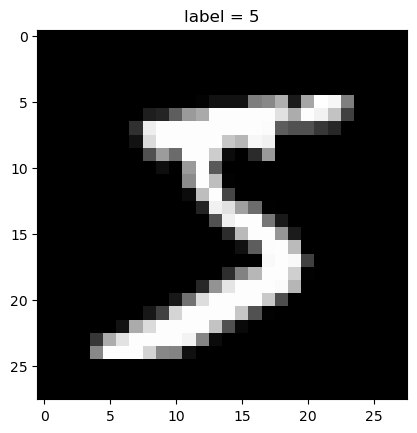

In [114]:
no = 0
plt.imshow(X_train[no], cmap='gray')
plt.title(f'label = {y_train[no]}')
plt.show

In [15]:
X_train_f = fmnist[0][0]
y_train_f = fmnist[0][1]
X_test_f = fmnist[1][0]
y_test_f = fmnist[1][1]

<function matplotlib.pyplot.show(close=None, block=None)>

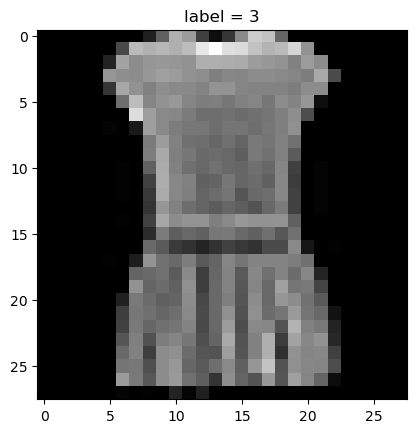

In [24]:
no = 3
plt.imshow(X_train_f[no], cmap='gray')
plt.title(f'label = {y_train_f[no]}')
plt.show

In [25]:
tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=1, padding='valid')

In [8]:
input_shape = (1, 3, 3, 1)

x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(1, 2, activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)


x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(1, 2, activation='relu', padding="same", input_shape=input_shape[1:])(x)
print(y.shape)

(1, 2, 2, 1)
(1, 3, 3, 1)


2022-11-29 09:30:29.833929: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [149]:
X_train = fmnist[0][0]
y_train = fmnist[0][1]
X_test = fmnist[1][0]
y_test = fmnist[1][1]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)



(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## np.newaxis

In [150]:
# 마지막에 삽입
print(X_train[..., np.newaxis].shape)

# 두번째에 삽입
print(X_train[:, np.newaxis].shape)

(60000, 28, 28, 1)
(60000, 1, 28, 28)


# MNIST Conv2D 실습

In [151]:
src = X_train[0]
print(src.shape)

input_shape = (-1,28,28,1)

X_train = tf.reshape(X_train, input_shape)
print(X_train.shape), print(X_train[0].shape)

X_train = X_train / 255

y1 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='same', 
                           input_shape=input_shape[1:])(X_train[:10])

y2 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='valid', 
                           input_shape=input_shape[1:])(X_train[:10])

y3 = tf.keras.layers.Conv2D(filters=1, kernel_size=9, activation='relu',
                           padding='same', 
                           input_shape=input_shape[1:])(X_train[:10])

y4 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='same', strides=2,
                           input_shape=input_shape[1:])(X_train[:10])

y5 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='valid', strides=(2, 1),
                           input_shape=input_shape[1:])(X_train[:10])

y6 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='same', strides=3,
                           input_shape=input_shape[1:])(X_train[:10])

y7 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='same', strides=7,
                           input_shape=input_shape[1:])(X_train[:10])

y8 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='same', strides=20,
                           input_shape=input_shape[1:])(X_train[:10])

y9 = tf.keras.layers.Conv2D(filters=4, kernel_size=3, activation='relu',
                           padding='same', strides=1,
                           input_shape=input_shape[1:])(X_train[:10])



(28, 28)
(60000, 28, 28, 1)
(28, 28, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

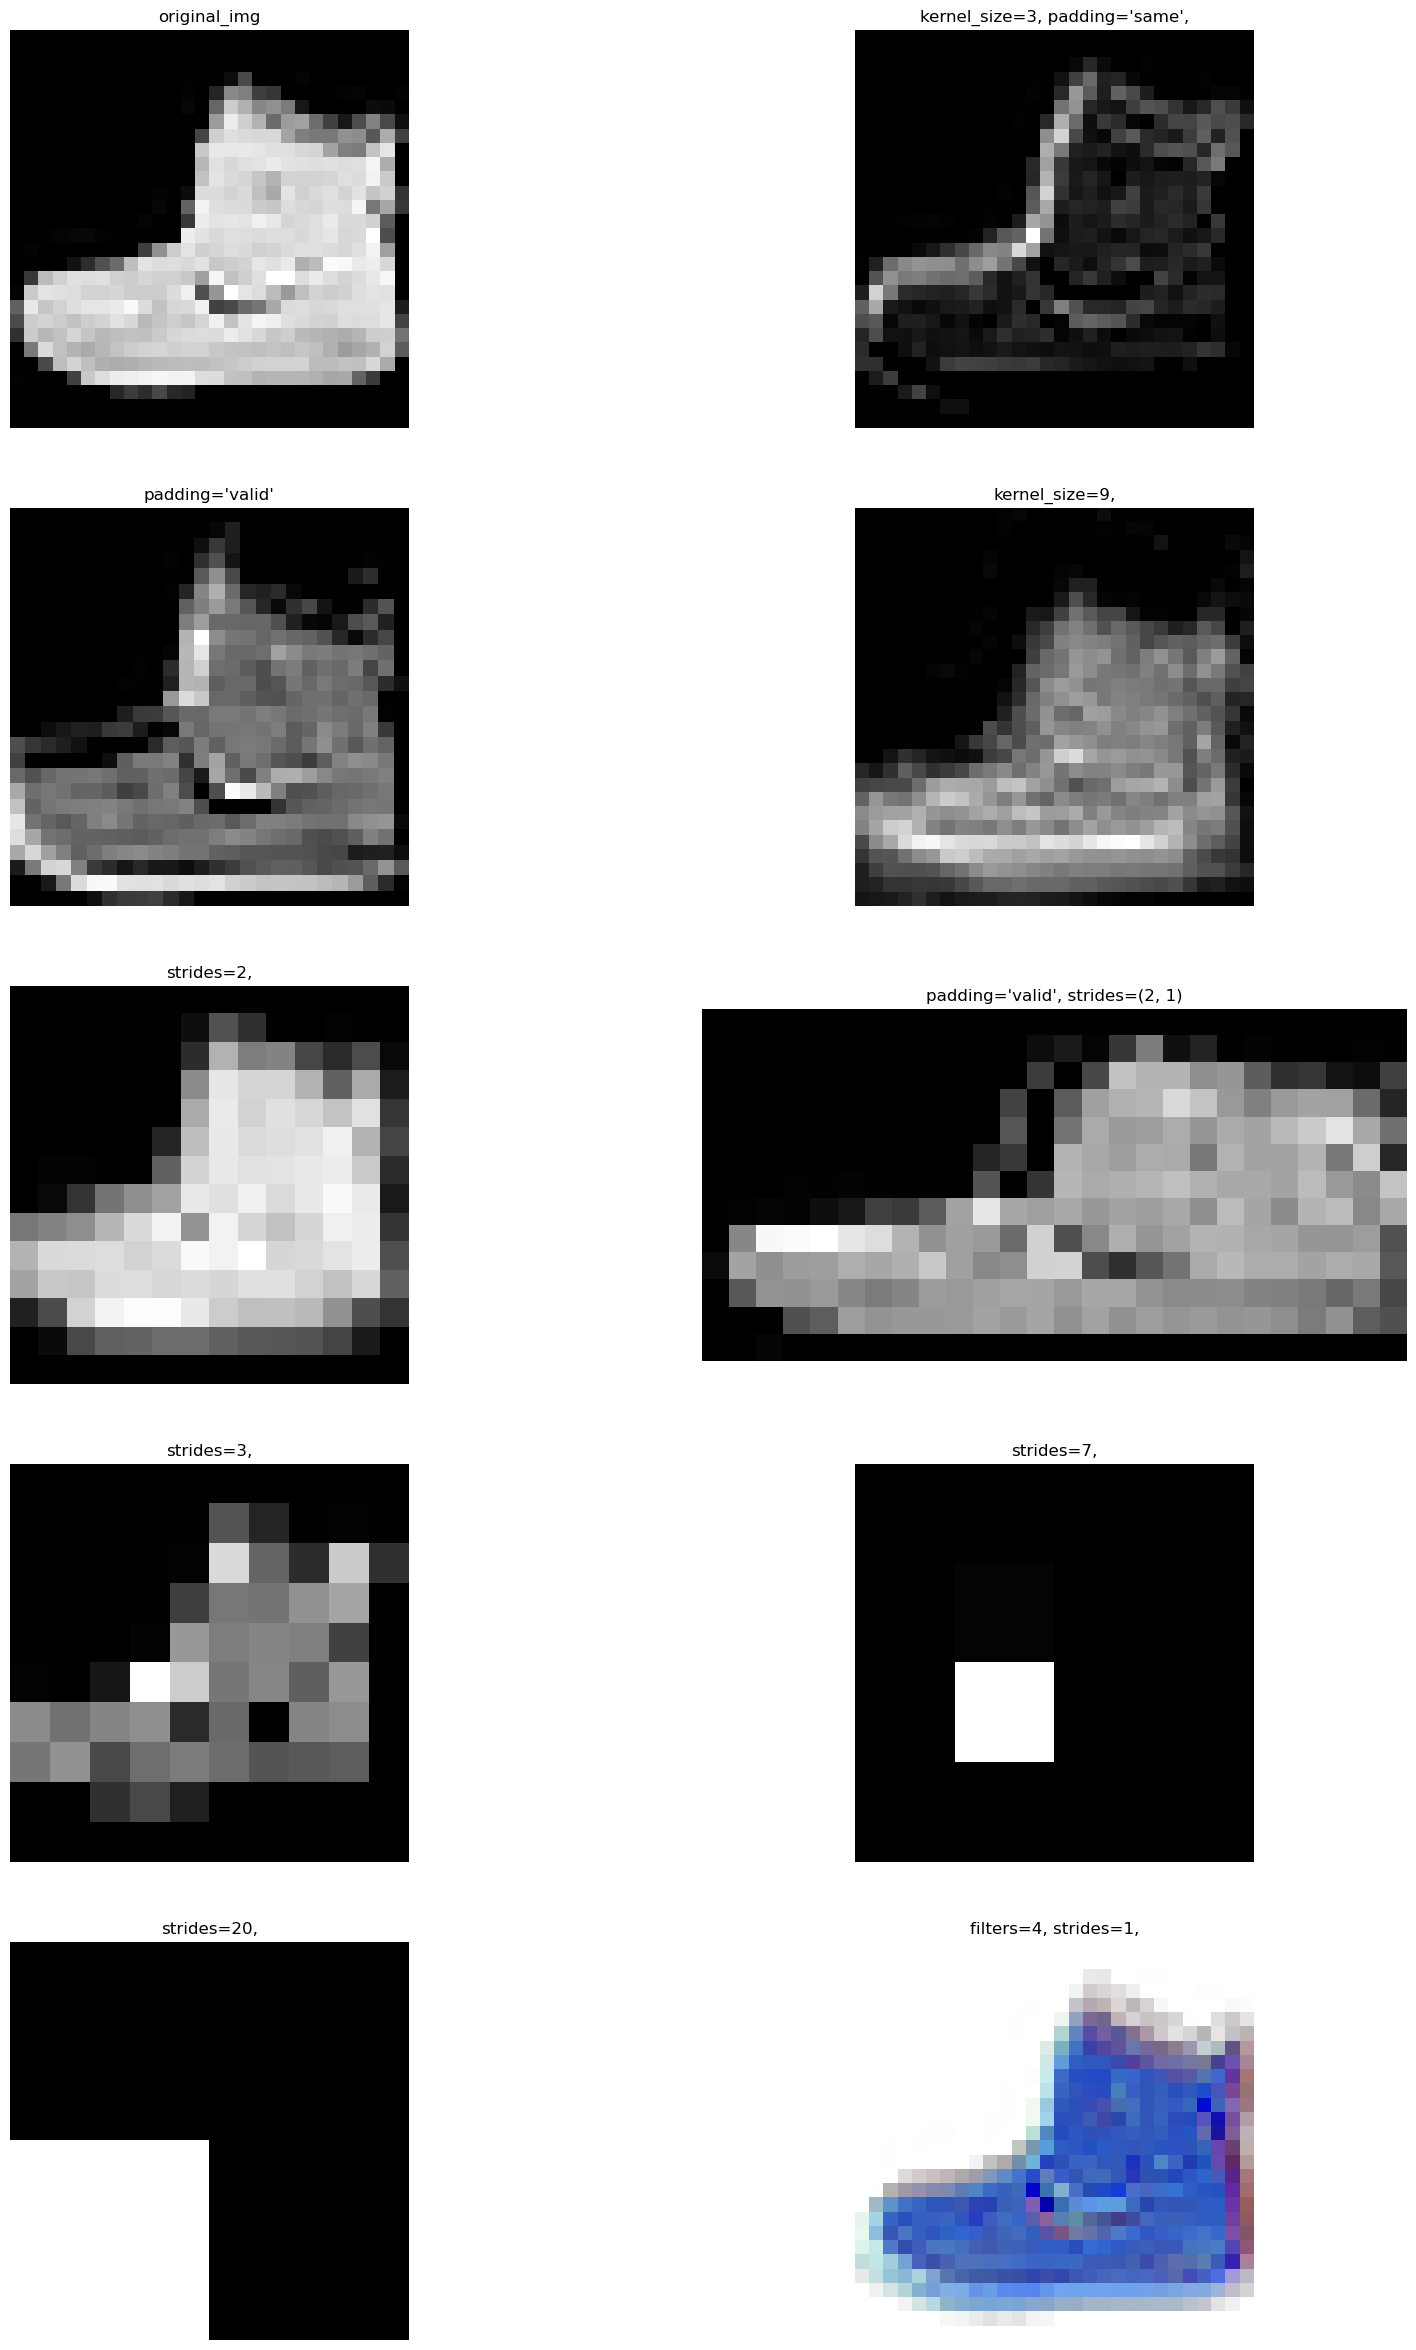

In [152]:
src = X_train[0]
dst = y[0]

plt.figure(figsize=(20,30))

ax1 = plt.subplot(521)
ax2 = plt.subplot(522)
ax3 = plt.subplot(523)
ax4 = plt.subplot(524)
ax5 = plt.subplot(525)
ax6 = plt.subplot(526)
ax7 = plt.subplot(527)
ax8 = plt.subplot(528)
ax9 = plt.subplot(529)
ax10 = plt.subplot(5, 2, 10)

ax1.imshow(src, cmap='gray')
ax2.imshow(y1[0], cmap='gray')
ax3.imshow(y2[0], cmap='gray')
ax4.imshow(y3[0], cmap='gray')
ax5.imshow(y4[0], cmap='gray')
ax6.imshow(y5[0], cmap='gray')
ax7.imshow(y6[0], cmap='gray')
ax8.imshow(y7[0], cmap='gray')
ax9.imshow(y8[0], cmap='gray')
ax10.imshow(y9[0], cmap='gray')

ax1.set_title("original_img")
ax2.set_title("kernel_size=3, padding='same',")
ax3.set_title("padding='valid'")
ax4.set_title("kernel_size=9,")
ax5.set_title("strides=2,")
ax6.set_title("padding='valid', strides=(2, 1)")
ax7.set_title("strides=3,")
ax8.set_title("strides=7,")
ax9.set_title("strides=20,")
ax10.set_title("filters=4, strides=1,")

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')
ax8.axis('off')
ax9.axis('off')
ax10.axis('off')
plt.show

# 케라스 학습
### 데이터 설정

In [32]:
mnist = tf.keras.datasets.fashion_mnist.load_data()

(x_train, y_train), (x_test, y_test) = mnist
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [35]:
# 인풋 이미지를를 3차원 텐서로 바꾸기
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 모델 정의, 컴파일

In [41]:
# Layer 쌓기
model = tf.keras.models.Sequential([         
  tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

### 모델 학습

In [43]:
# EarlyStopping Callback 정의하기
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=1, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

# Model.fit을 통해 학습하기
model.fit(
    x=x_train, y=y_train, batch_size=32, epochs=50, verbose=1,
    callbacks=callback, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3490 - accuracy: 0.8754 - val_loss: 0.3315 - val_accuracy: 0.8787
Epoch 2/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3251 - accuracy: 0.8806 - val_loss: 0.2991 - val_accuracy: 0.8935
Epoch 3/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3107 - accuracy: 0.8864 - val_loss: 0.2769 - val_accuracy: 0.9027
Epoch 4/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2961 - accuracy: 0.8909 - val_loss: 0.2809 - val_accuracy: 0.8959


# Pooling
> Average Pooling : 주변의 값까지 고려함

img.shape : (1, 4, 4, 1)
img_rm.shape : (4, 4)
max_pool_2d_1(img).shape : 3
(2, 2)


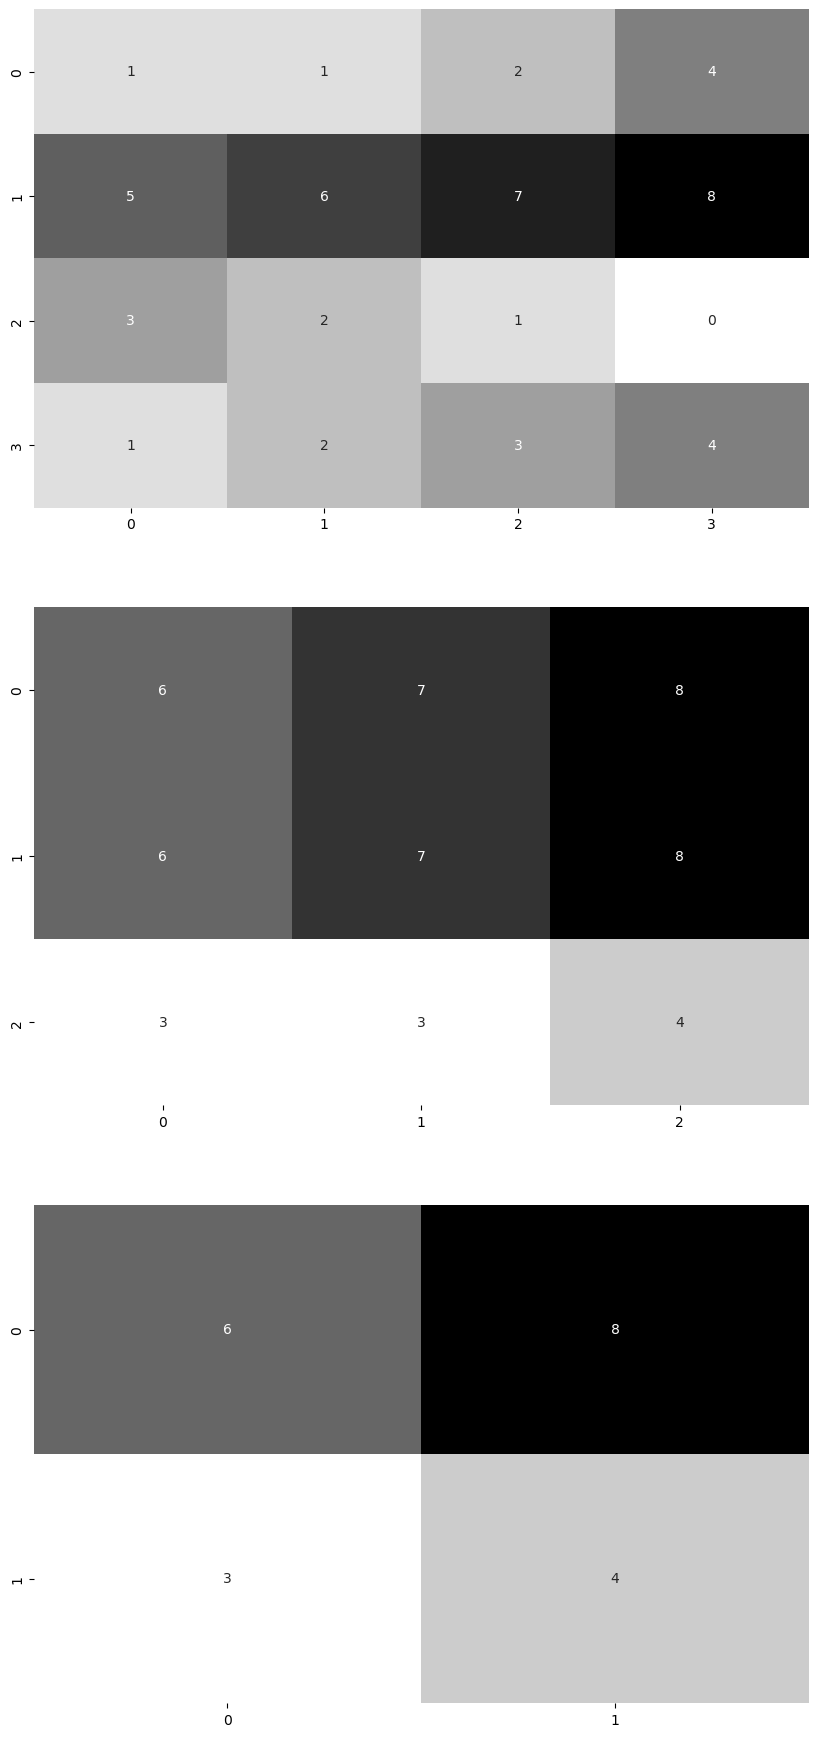

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D

img = tf.constant([[[[1],[1],[2],[4]], 
                     [[5],[6],[7],[8]],
                     [[3],[2],[1],[0]],
                     [[1],[2],[3],[4]]]], dtype=np.float32)
print("img.shape :", img.shape)


img_rm = img.numpy().reshape(4, 4)
print("img_rm.shape :", img_rm.shape)


max_pool_2d_1 = MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid')
max_pool_2d_2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')

print("max_pool_2d_1(img).shape :",max_pool_2d_1(img).shape[2])

result1 = max_pool_2d_1(img).numpy().reshape(max_pool_2d_1(img).shape[1], max_pool_2d_1(img).shape[2])
result2 = max_pool_2d_2(img).numpy().reshape(max_pool_2d_2(img).shape[1], max_pool_2d_2(img).shape[2])

# result_image1 = tf.reshape(result1[0], [1,3,3])
# result_image2 = tf.reshape(result2[0], [1,2,2])


print(result2.shape)

plt.figure(figsize=(10,22))
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)

sns.heatmap(pd.DataFrame(img_rm).astype('int64'), cbar=False, annot=True, fmt='d',cmap='gray_r', ax=ax1)
sns.heatmap(pd.DataFrame(result1).astype('int64'),cbar=False, annot=True, fmt='d',cmap='gray_r', ax=ax2)
sns.heatmap(pd.DataFrame(result2).astype('int64'),cbar=False, annot=True, fmt='d',cmap='gray_r', ax=ax3)
plt.show()

# LENA를 통한 Pooling

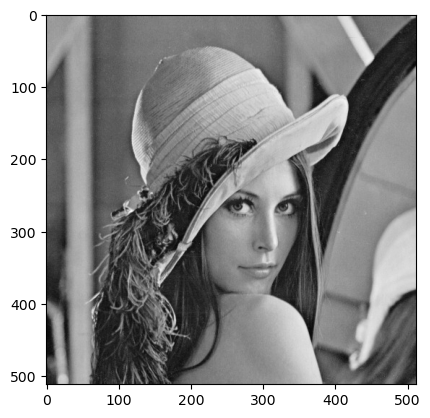

src.shape : (512, 512)
src_new.shape : (1, 512, 512, 1)
src_new.shape : (1, 512, 512, 1)
y5.shape : (1, 128, 128, 1)
y6.shape : (1, 64, 64, 1)


In [270]:
import cv2

src = cv2.imread('./image/lena.jpg', 0)

plt.imshow(src, cmap='gray')
plt.show()

print("src.shape :",src.shape)
input_shape = (-1,512,512,1)

src_new = tf.reshape(src, input_shape)
print("src_new.shape :",src_new.shape)

src_new = src_new / 255
print("src_new.shape :",src_new.shape)


y1 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='same',
                           input_shape=input_shape[1:])(src_new)

y2 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='same',
                           input_shape=input_shape[1:])(y1)

y3 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='same',
                           input_shape=input_shape[1:])(y2)

y4 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='same', strides=2,
                           input_shape=input_shape[1:])(y3)

y5 = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu',
                           padding='same', strides=2,
                           input_shape=input_shape[1:])(y4)

print("y5.shape :",y5.shape)

max_pool_2d_2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')

# print("max_pool_2d_1(img).shape :",max_pool_2d_1(img).shape[2])

y6 = max_pool_2d_2(y5)
print("y6.shape :", y6.shape)



<function matplotlib.pyplot.show(close=None, block=None)>

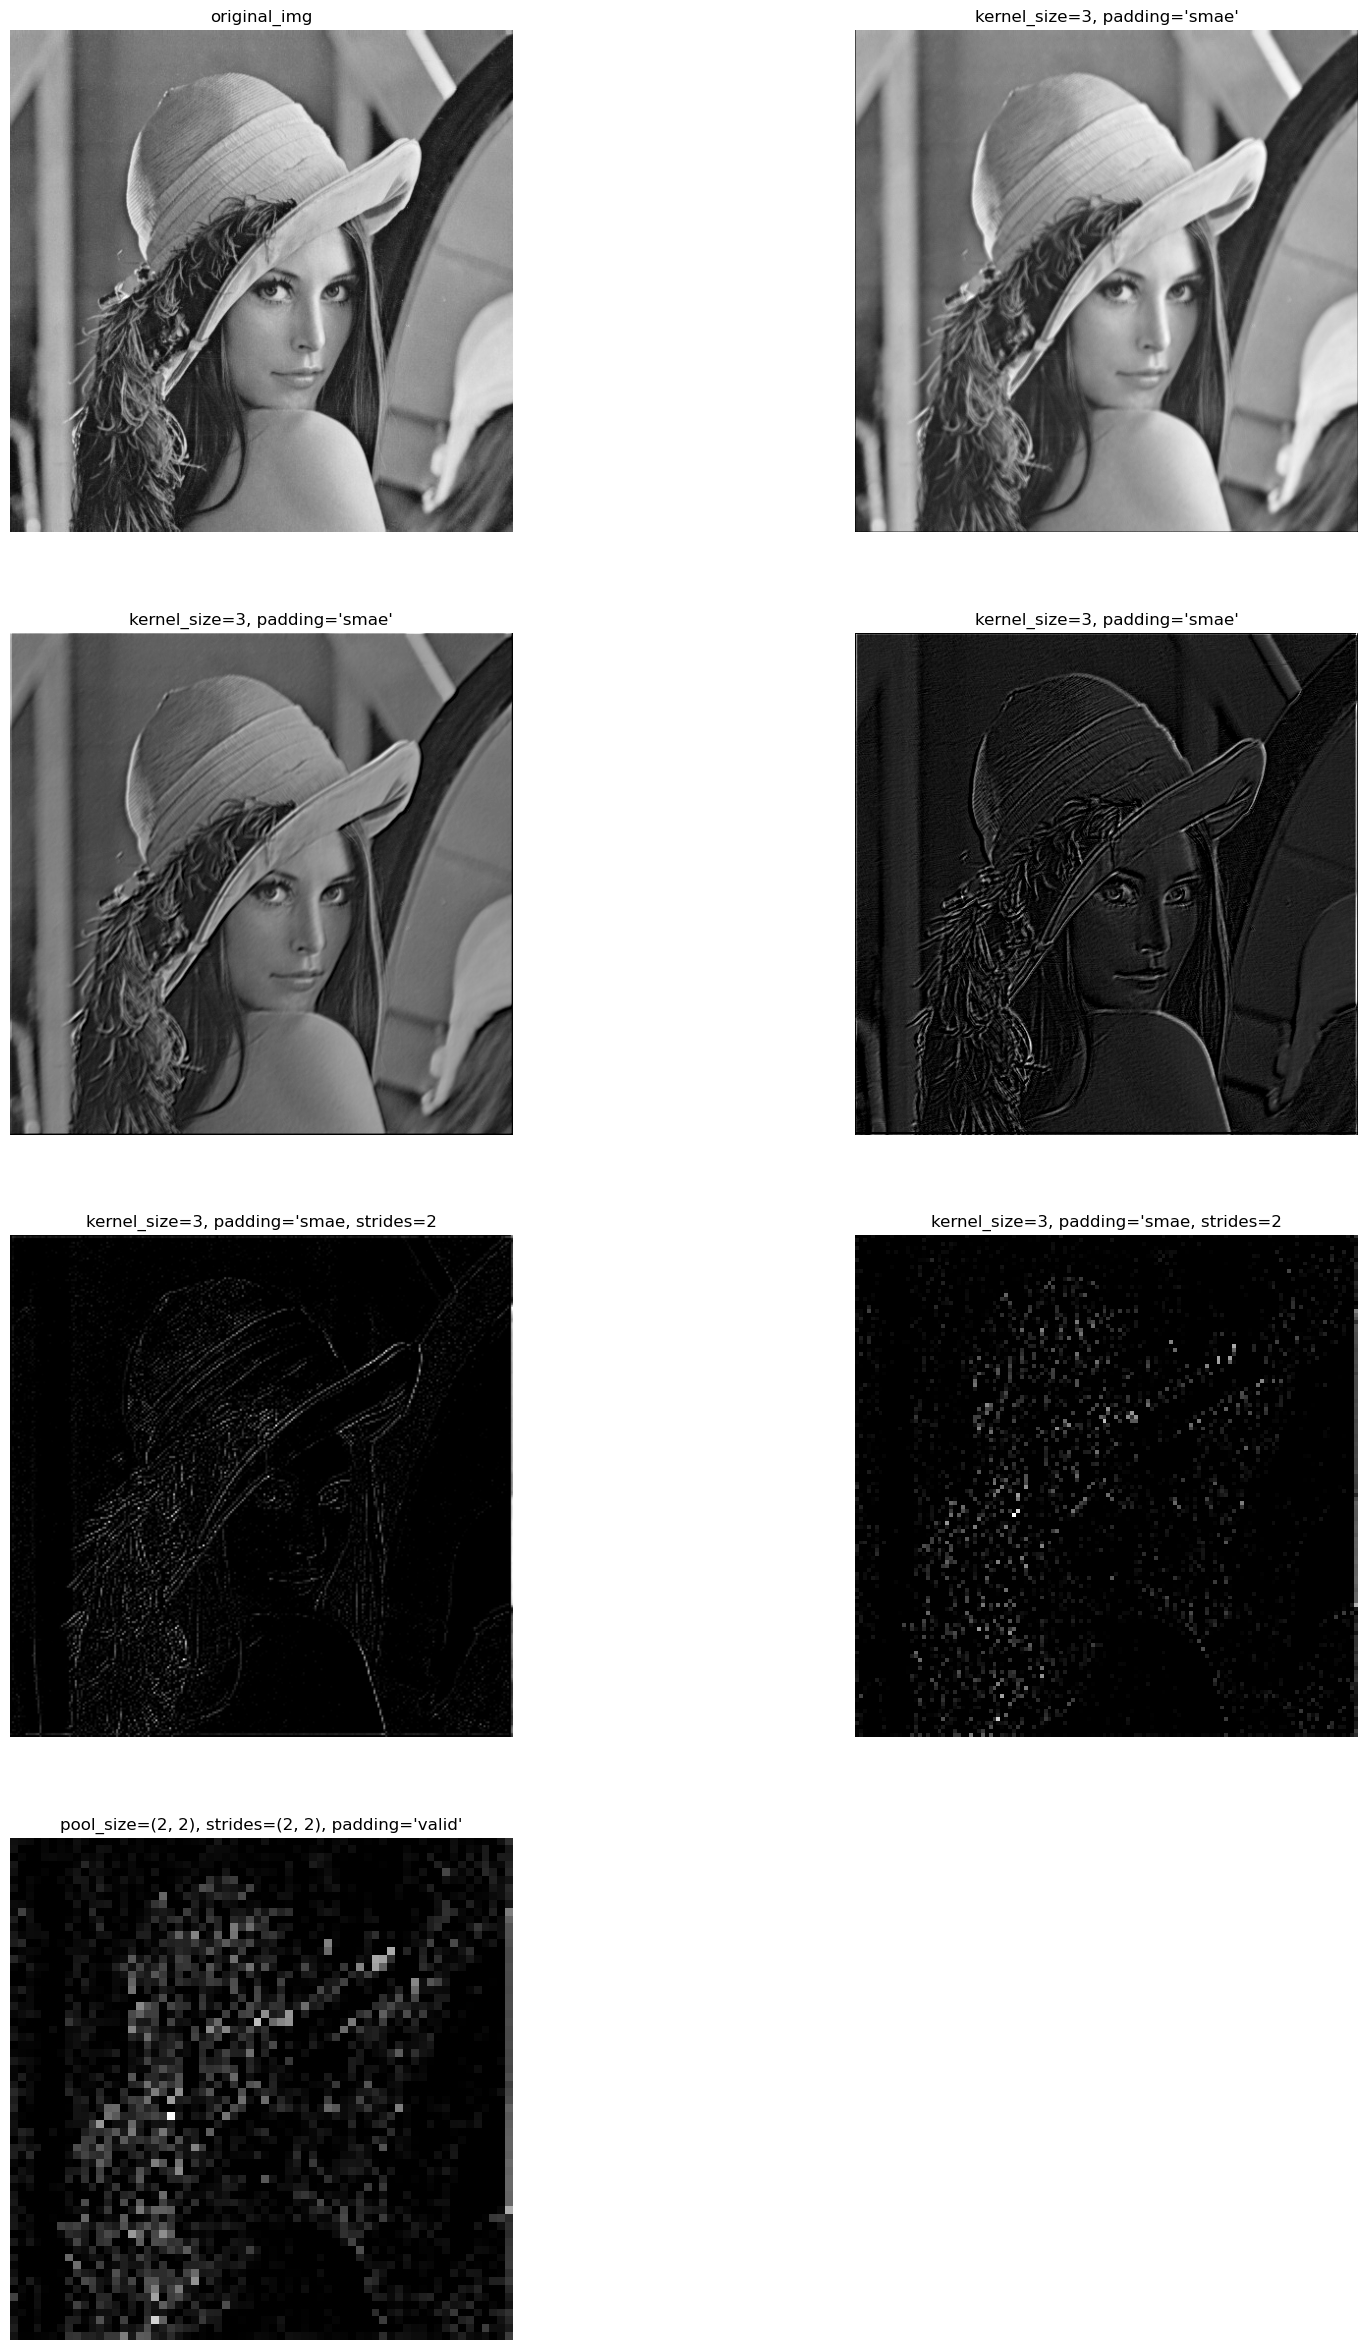

In [271]:
plt.figure(figsize=(20,30))

ax1 = plt.subplot(421)
ax2 = plt.subplot(422)
ax3 = plt.subplot(423)
ax4 = plt.subplot(424)
ax5 = plt.subplot(425)
ax6 = plt.subplot(426)
ax7 = plt.subplot(427)


ax1.imshow(src, cmap='gray')
ax2.imshow(y1[0], cmap='gray')
ax3.imshow(y2[0], cmap='gray')
ax4.imshow(y3[0], cmap='gray')
ax5.imshow(y4[0], cmap='gray')
ax6.imshow(y5[0], cmap='gray')
ax7.imshow(y6[0], cmap='gray')


ax1.set_title("original_img")
ax2.set_title("kernel_size=3, padding='smae'")
ax3.set_title("kernel_size=3, padding='smae'")
ax4.set_title("kernel_size=3, padding='smae'")
ax5.set_title("kernel_size=3, padding='smae, strides=2")
ax6.set_title("kernel_size=3, padding='smae, strides=2")
ax7.set_title("pool_size=(2, 2), strides=(2, 2), padding='valid'")


ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')

plt.show

# MNIST DATASET CV 학습 평가

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)
x_test : (10000, 28, 28, 1)
y_test : (10000,)
y_test[:10] : [7 2 1 0 4 1 4 9 5 9]
y_test_m.shape : (10000, 10)
y_test_m[0] : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y_test_m[1] : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


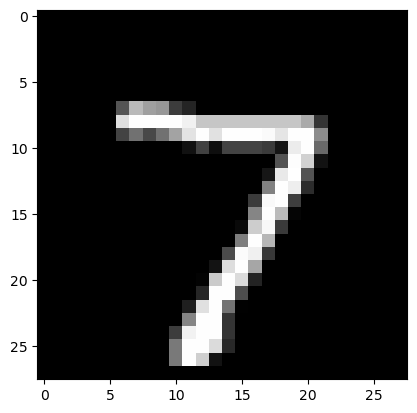

In [329]:
from keras.utils import to_categorical

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)

# 인풋 이미지를를 3차원 텐서로 바꾸기
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape, x_test.shape)

print("x_test :", x_test.shape)
print("y_test :", y_test.shape)

print("y_test[:10] :", y_test[:10])
plt.imshow(x_test[0], cmap='gray')


y_train_m = to_categorical(y_train)
y_test_m = to_categorical(y_test)

print("y_test_m.shape :", y_test_m.shape)
print("y_test_m[0] :", y_test_m[0])
print("y_test_m[1] :", y_test_m[1])



### 모델 설정

In [ ]:

model1 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
])
model2 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation='relu')  
])
model3 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu')  
])
model4 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(32, activation='relu') 
])
model5 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax')
])




# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# model.summary()

# model.fit(
#     x=x_train, y=y_train, batch_size=32, epochs=50, verbose=1,
#     callbacks=callback, validation_split=0.2)

In [314]:
def mdFit(model) : 
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model.summary()

    model.fit(
        x=x_train, y=y_train, batch_size=32, epochs=50, verbose=1,
        callbacks=callback, validation_split=0.2)
    
def mdEval(model, x_tst, y_tst) :
    model.evaluate(X_tst, y_tst)

    
    
mdList = [model1, model2, model3, model4, model5]

for model in mdList :
    mdFit(model)
    
for model in mdList :
    mdEval(model)


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 20.6904 - accuracy: 0.0000e+00 - val_loss: 20.6857 - val_accuracy: 0.0000e+00
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 20.6904 - accuracy: 0.0000e+00 - val_loss: 20.6857 - val_accuracy: 0.0000e+00
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 784)               0         
                                                          

In [ ]:


# Layer 쌓기
model = tf.keras.models.Sequential([         
  tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [274]:
from keras.utils import to_categorical



y_train_m = to_categorical(y_train_m)
y_test_m = to_categorical(y_test_m)

y_test_m[0]
